In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('fer2013.csv')

# Check class distribution
print(df['emotion'].value_counts())


emotion
3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: count, dtype: int64


In [2]:
TARGET_COUNT = 5000


In [3]:
import numpy as np

# Store balanced dataframes
balanced_data = []

# Loop through all emotion labels
for emotion_label in df['emotion'].unique():
    class_subset = df[df['emotion'] == emotion_label]
    current_count = len(class_subset)
    
    if current_count > TARGET_COUNT:
        # Downsample
        balanced = class_subset.sample(n=TARGET_COUNT, random_state=42)
    elif current_count < TARGET_COUNT:
        # Upsample with replacement
        balanced = class_subset.sample(n=TARGET_COUNT, replace=True, random_state=42)
    else:
        balanced = class_subset
    
    balanced_data.append(balanced)

# Concatenate all balanced class data
balanced_df = pd.concat(balanced_data).sample(frac=1, random_state=42).reset_index(drop=True)

# Check new distribution
print(balanced_df['emotion'].value_counts())


emotion
6    5000
2    5000
4    5000
5    5000
0    5000
3    5000
1    5000
Name: count, dtype: int64


In [4]:
balanced_df.to_csv('fer2013_balanced_5000.csv', index=False)


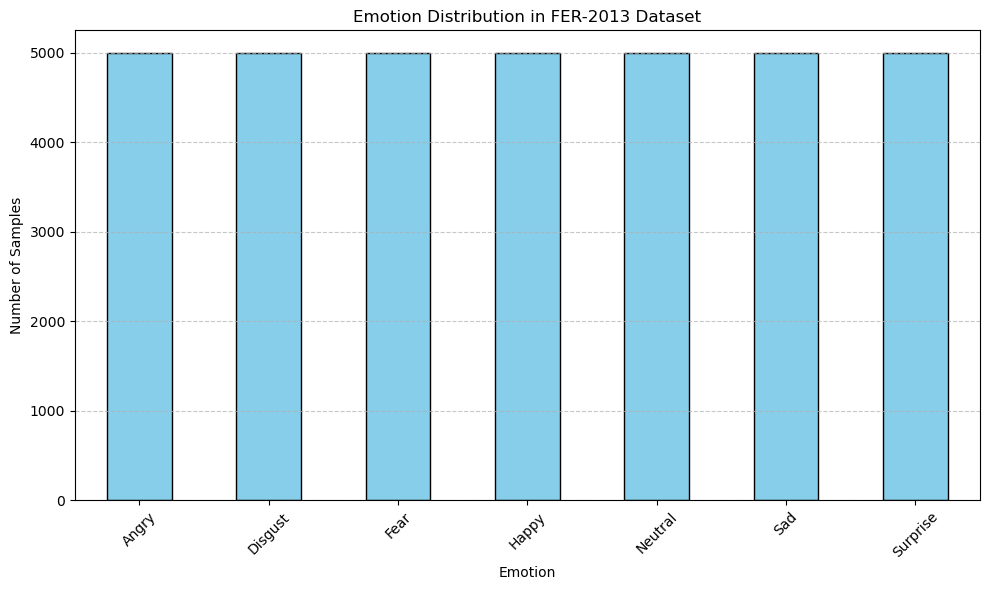

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('fer2013_balanced_5000.csv')

# Emotion label mapping
emotion_labels = {
    0: 'Angry',
    1: 'Disgust',
    2: 'Fear',
    3: 'Happy',
    4: 'Sad',
    5: 'Surprise',
    6: 'Neutral'
}

# Replace numeric labels with text
df['emotion'] = df['emotion'].map(emotion_labels)

# Count each emotion
emotion_counts = df['emotion'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
emotion_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Labels and title
plt.title('Emotion Distribution in FER-2013 Dataset')
plt.xlabel('Emotion')
plt.ylabel('Number of Samples')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()

# Save the figure
plt.savefig('fer2013_emotion_5000.png', dpi=300)

# Show the plot
plt.show()
